In [1]:
import numpy as np
import pandas as pd
import scipy.signal
from scipy.stats import entropy
import mne


subj=pd.read_csv(r'C:\Users\giannos\Desktop\Biosignal\fatigued\AD_event2_noisy.csv', header=None, index_col=False)
#print(subj.info)
#data = subj.to_numpy()


In [2]:
channels=['Fp1','AF7','AF3','F1','F3','F5','F7','FT7','FC5','FC3','FC1','C1','C3','C5','T7','TP7','CP5','CP3','CP1','P1','P3','P5','P7','P9','PO7','PO3','O1','Oz','POz','Pz','CPz','Fpz','Fp2','AF8','AF4','AFz','Fz','F2','F4','F6','F8','FT8','FC6','FC4','FC2','FCz','Cz','C2','C4','C6','T8','TP8','CP6','CP4','CP2','P2','P4','P6','P8','P10','PO8','PO4','O2']

info = mne.create_info(ch_names=channels, sfreq=256, ch_types='eeg')

raw = mne.io.RawArray(subj.values, info)

Creating RawArray with float64 data, n_channels=63, n_times=769
    Range : 0 ... 768 =      0.000 ...     3.000 secs
Ready.


Using matplotlib as 2D backend.


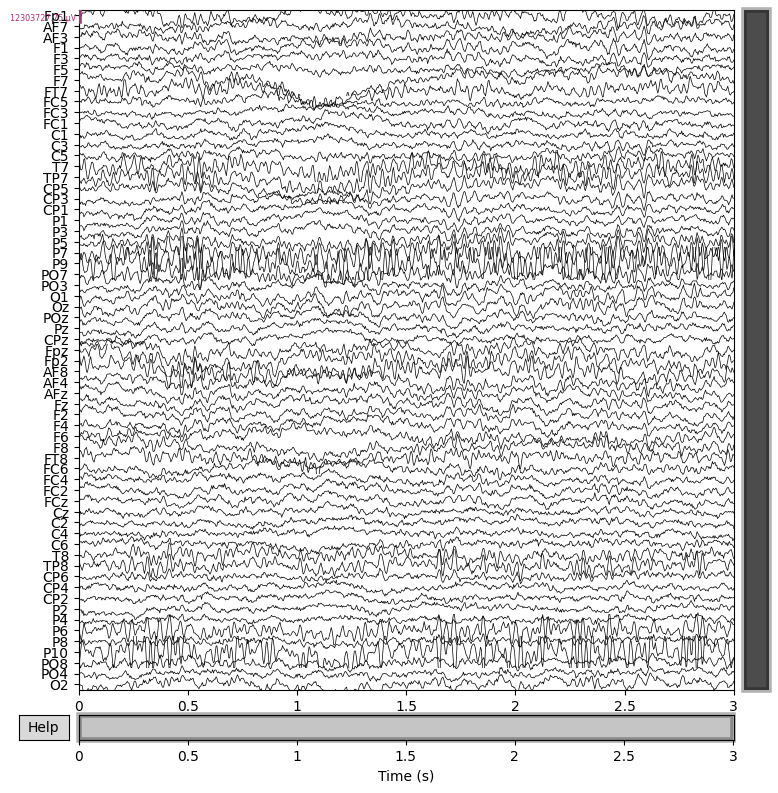

In [3]:
raw.plot(n_channels=63, scalings='auto', title='EEG Data', show=True);

In [4]:
filt = raw.filter(1, 35, fir_design='firwin')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\giannos\AppData\Local\Temp\ipykernel_8172\1369253465.py:1: RuntimeWarning: filter_length (845) is longer than the signal (769), distortion is likely. Reduce filter length or filter a longer signal.
  filt = raw.filter(1, 35, fir_design='firwin')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    0.0s finished


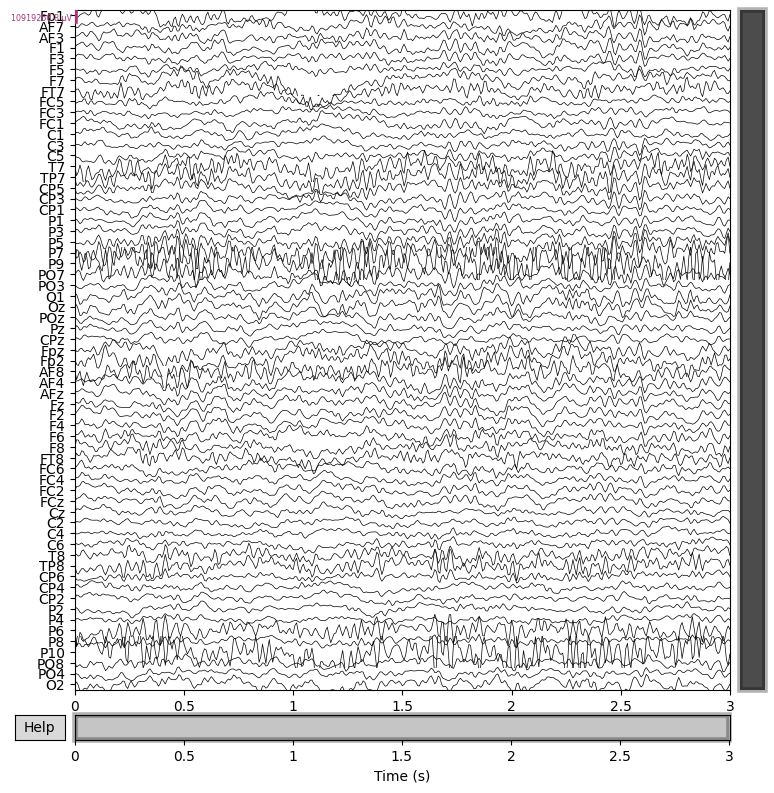

In [5]:
filt.plot(n_channels=63, scalings='auto', title='EEG Data', show=True);

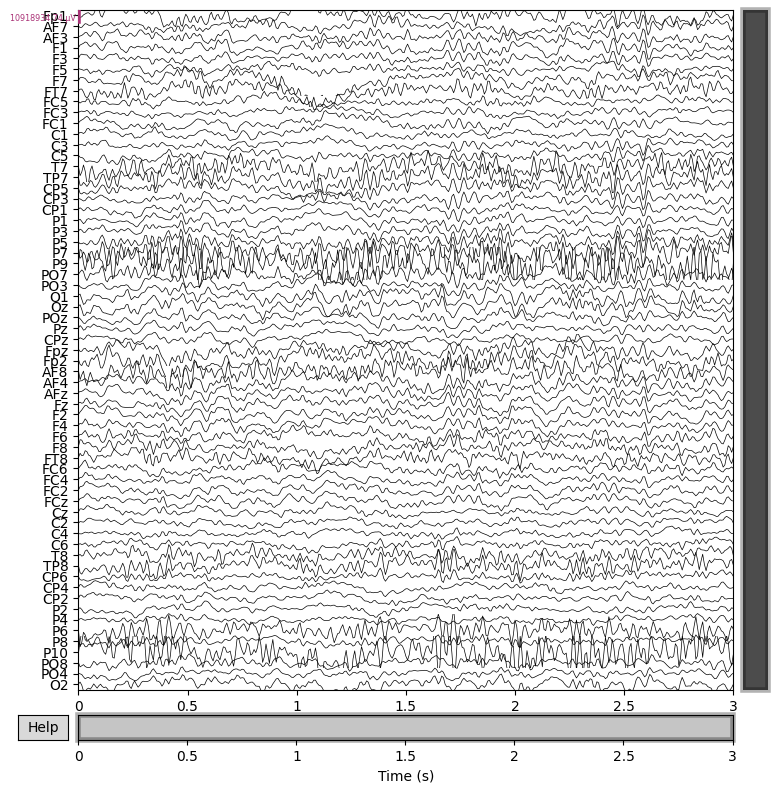

In [6]:
baseline_mean = filt.get_data().mean(axis=-1)


baseline = filt.copy()
baseline._data -= baseline_mean[:, np.newaxis]

baseline.plot(n_channels=63, scalings='auto', title='EEG Data', show=True);

In [7]:
baseline._data=scipy.signal.detrend(baseline._data)

In [13]:
bands = {
    'Delta': (1, 4),
    'Theta': (4, 8),
    'Alpha': (8, 13),
    'Beta': (13, 30),
    'Gamma': (30, 35)
}

chan = 63
n_samples = 769
entropy_arrays = []


for channel_idx in range(baseline.info['nchan']):
        channel_name = baseline.ch_names[channel_idx]
        entropy_values = np.zeros((len(bands), len(baseline.times))) 
        
        for band_idx, (band_name, (freq_min, freq_max)) in enumerate(bands.items()):

            filtered_data = mne.filter.filter_data(baseline[channel_idx][0], baseline.info['sfreq'],
                                                l_freq=freq_min, h_freq=freq_max, verbose=False)
    
            diff_entropy = entropy(filtered_data, base=2)
            entropy_values[band_idx] = diff_entropy
                
        #mean_value = np.mean(entropy_values, axis=1)
        entropy_arrays.append(entropy_values)

differential_entropy_array = np.array(entropy_arrays)

C:\Users\giannos\AppData\Local\Temp\ipykernel_8172\2300760568.py:20: RuntimeWarning: filter_length (845) is longer than the signal (769), distortion is likely. Reduce filter length or filter a longer signal.
  filtered_data = mne.filter.filter_data(baseline[channel_idx][0], baseline.info['sfreq'],
C:\Users\giannos\AppData\Local\Temp\ipykernel_8172\2300760568.py:20: RuntimeWarning: filter_length (845) is longer than the signal (769), distortion is likely. Reduce filter length or filter a longer signal.
  filtered_data = mne.filter.filter_data(baseline[channel_idx][0], baseline.info['sfreq'],
C:\Users\giannos\AppData\Local\Temp\ipykernel_8172\2300760568.py:20: RuntimeWarning: filter_length (845) is longer than the signal (769), distortion is likely. Reduce filter length or filter a longer signal.
  filtered_data = mne.filter.filter_data(baseline[channel_idx][0], baseline.info['sfreq'],
C:\Users\giannos\AppData\Local\Temp\ipykernel_8172\2300760568.py:20: RuntimeWarning: filter_length (845

In [14]:
differential_entropy_array.shape

(63, 5, 769)